# Effect of Pre-Treatment Time on Quality Characteristics of Orange Flesh Potatoes

## Introduction

Orange Fleshed Sweet Potatoes (OFSP) was sliced and pre-treated by blanching in hot water and ascorbic acid. Different samples were blanched at different times, 1min, 2min and 3min in each treatment. A control where no pre-treatment was applied was also included in the experiment. The samples were prepared in three triplicates and each triplicate further dried at 3 different temperatures; 50, 60 and 70C till there was very little to no noticeable change in mass. The samples were then milled and tested for different quality indices including colour, Swelling Index (SI) and Water Absorption Capacity (WAC).


### Colour

Surface color of samples was measured using a HunterLab D25 Color Difference Meter. L, a, and b values represent different properties to be recorded

- L represents Luminance, ranging from 0(black) to 100(white)
- a represents the green/red ratio ranging from-120(green) to 120(red)
- b represents the blue/yellow also ranging from -120(blue) to 120(yellow)

### Swelling Index (SI)

Swelling Index is the volume in milliliter taken up by the swelling of one gram (1 g)of food material under specific conditions.

The starch samples (0.1g) were weighed into a test tube and 10ml of distilled water was added. The mixture of was heated to 50C in a water bath at a temperature of 50C for 30min with continuous shaking. The test tube was then be centrifuged at 1500rpm for 20min in order to facilitate the removal of the supernatant which then was carefully decanted and weight of the starch paste would be taken. The swelling power would be calculated as follows:

- Swelling Power = Weight of starch paste / Weight of dry starch sample

### Water Absorption Capacity(WAC)

Water Absorption Capacity is the amount of water (moisture) taken up by food/flour to achieve the desirable consistency and create quality food product. 

The starch samples (5% w/v) were rigorously agitated by hand for about two minutes. They were then dispersed in a pre-weighed centrifuge tube. The supernatant was discarded and the weight of the tube hydrated sample taken. The weight was calculated and expressed as the weight of water bound by 100g dry starch.



# Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#load the data

df = pd.read_excel('Colour data.xlsx')

In [3]:
#Explore the data

df.head(5)

,Temperature,Treatment,Time,L,a,b,SI,WAC
0,50,control,0min,66.03,11.78,24.41,0.62,3.05
1,50,control,0min,66.96,11.70,24.80,0.60,3.07
2,50,control,0min,66.13,12.05,24.49,0.62,3.03
3,50,hot water,1min,64.43,12.50,24.00,0.65,3.11
4,50,hot water,1min,64.29,12.21,23.87,0.65,3.09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  63 non-null     int64  
 1   Treatment    63 non-null     object 
 2   Time         63 non-null     object 
 3   L            63 non-null     float64
 4   a            63 non-null     float64
 5   b            63 non-null     float64
 6   SI           63 non-null     float64
 7   WAC          63 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.1+ KB


In [5]:
#convert the Temperature column dtype from (int) to (str)

df['Temperature'] = df['Temperature'].astype(str)

In [6]:
#convert Temperature, Treatment and Time to categories for efficient visualisation

category = {'Temperature': ['50', '60', '70'], 'Treatment': ['control', 'hot water', 'ascorbic acid'], 
            'Time' :['0min','1min','2min','3min']}

for cat in category:
    to_category = pd.api.types.CategoricalDtype( categories = category[cat])
    df[cat] = df[cat].astype(to_category)
    
#worafr_maize['year'] = worafr_maize['year'].astype(str)
#worafr_wheat['year'] = worafr_wheat['year'].astype(str)

In [7]:
#Confirm Changes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Temperature  63 non-null     category
 1   Treatment    63 non-null     category
 2   Time         63 non-null     category
 3   L            63 non-null     float64 
 4   a            63 non-null     float64 
 5   b            63 non-null     float64 
 6   SI           63 non-null     float64 
 7   WAC          63 non-null     float64 
dtypes: category(3), float64(5)
memory usage: 3.2 KB


# Univariate Analysis

> In this section we explore the each feature/variable in the data. We study the range of values, as well as the central tendencies of the values. This kind of analysis describes each variable on it's own. Descriptive statistics describe and summarize data.

## Descriptive Statistics

In [8]:
# Summary descriptive statistics of central tendencies

df.describe()

,L,a,b,SI,WAC
count,63.000000,63.000000,63.000000,63.000000,63.00000
mean,64.155873,12.604603,24.069048,0.735556,3.42127
std,3.817928,1.802788,1.208027,0.062496,0.49060
min,56.820000,7.880000,21.910000,0.600000,2.24000
25%,61.645000,11.795000,23.410000,0.675000,3.06000
50%,64.320000,12.310000,23.960000,0.740000,3.48000
75%,66.335000,14.065000,24.605000,0.775000,3.62000
max,72.340000,15.770000,26.850000,0.840000,4.33000


#### OBSERVATIONS

- L with a minimum value of 56.8 and mean of 64.2 represents a relatively high value in lightness to darkness.

- a had a minimum of 12.6 and a mean of 7.99 describing relatively more red appearance to green. 

- b recorded a recorded a minimun value of 21.9 and a mean of 24.1 representing relatively more yellow than blue. The maximum of 26.9 tells us the range of **b** values were very small.

- Note the difference between the standard deviations of SI and WAC (relatively small) and Color properties (relatively high)

## Plots of Statistical Summary for Color values

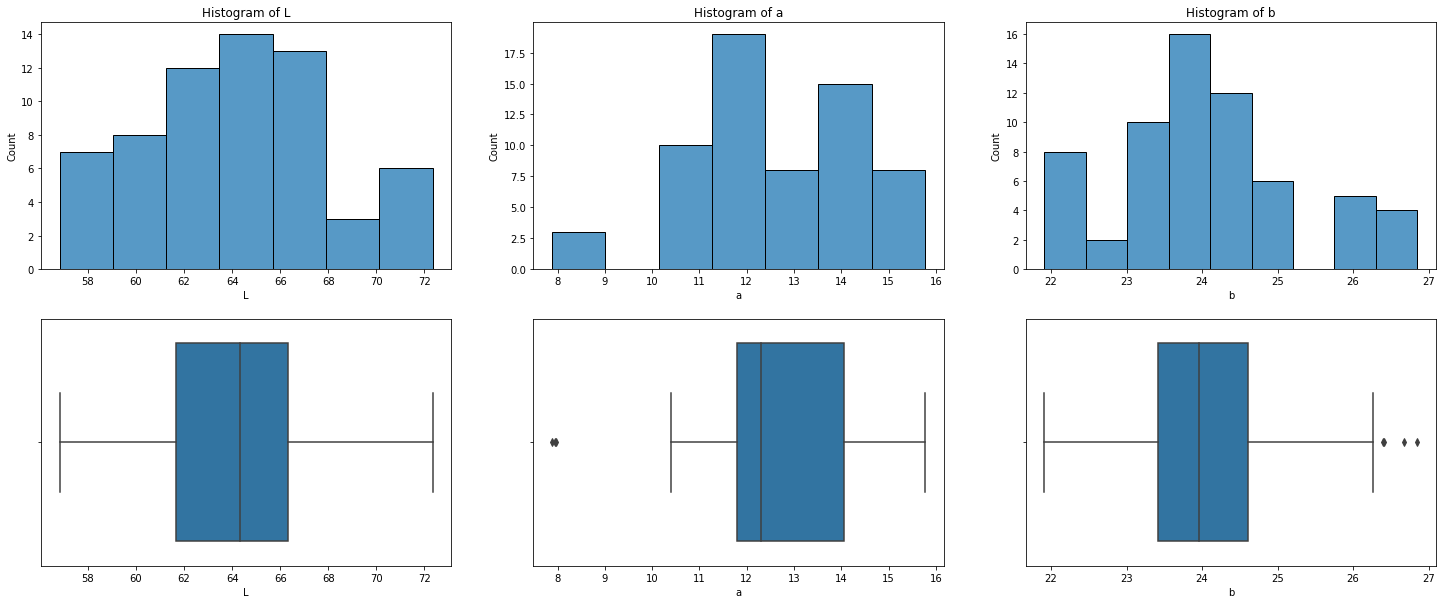

In [9]:
fig,ax=plt.subplots(ncols=3, nrows=2, figsize=[25,10])
sns.histplot(df, x='L',ax=ax[0,0])
ax[0,0]. set_title('Histogram of L')
sns.histplot(df, x='a',ax=ax[0,1])
ax[0,1]. set_title('Histogram of a')
sns.histplot(df, x='b',ax=ax[0,2])
ax[0,2]. set_title('Histogram of b')
sns.boxplot(data=df, x='L', ax=ax[1,0])
sns.boxplot(data=df, x='a', ax=ax[1,1])
sns.boxplot(data=df, x='b', ax=ax[1,2]);

### OBSERVATIONS

- L vaues decreased sharply at the tail end of the recorded range

- a range was affected by some outliers representing the minimum. Without that, the a would have had a relatively smaller range as well.

- b was also affected by outliers causing a larger maximum than the data would admit. b would have an even smaller range IN the outliers are ignored.


## Plots of Statistical Summary for SI and WAC

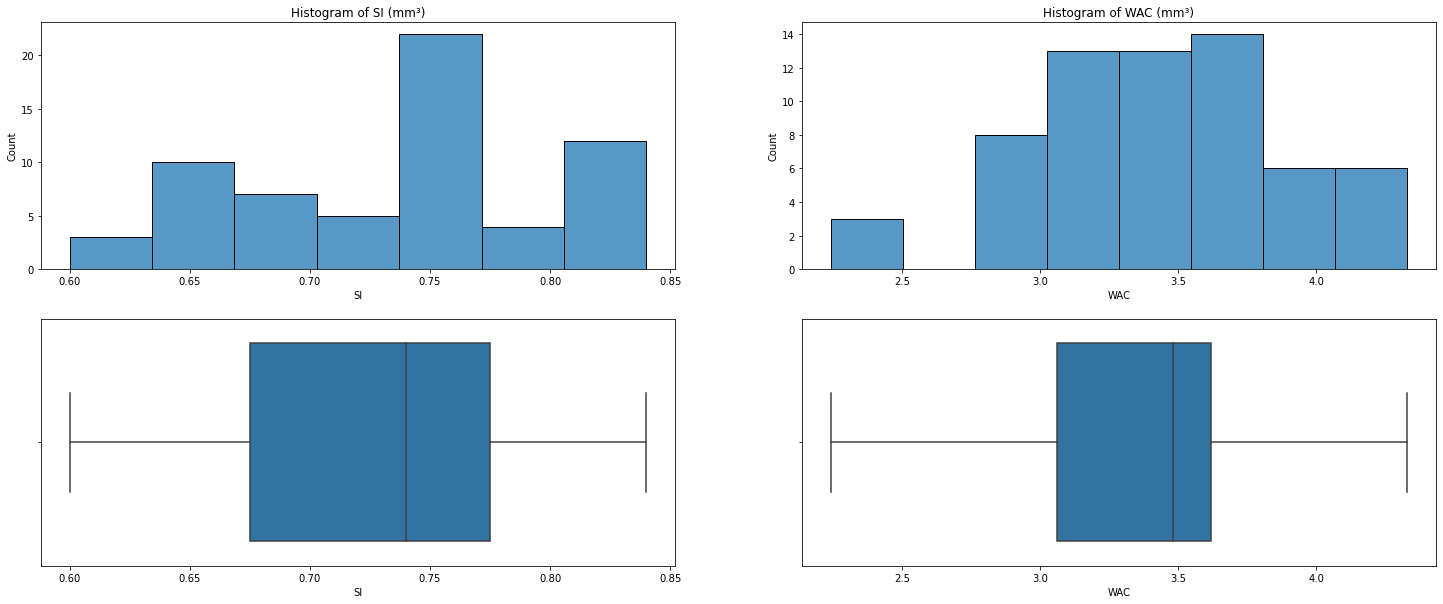

In [10]:
fig,ax=plt.subplots(ncols=2, nrows=2, figsize=[25,10])
sns.histplot(data=df, x='SI', ax=ax[0,0])
ax[0,0]. set_title('Histogram of SI (mm\u00b3)')
sns.histplot(data=df, x='WAC', ax=ax[0,1])
ax[0,1]. set_title('Histogram of WAC (mm\u00b3)')
sns.boxplot(data=df, x='SI', ax=ax[1,0])
sns.boxplot(data=df, x='WAC', ax=ax[1,1]);

### OBSERVATIONS

- SI values were low across the range of values except for a very high peak around 0.75mm\**3 representing a high concentration of values in that region

- WAC had a distribution slightly similar to a uniform distribution with its mean close to the 50th percentile.

## Relationsip between recorded features (Correlation)

In this section we would like to study which features have a direct relationship and might be affected by the change of it relational variable. We use Python's seaborn  to summarize this relationship by outputing the R\**2 values.

R\**2 values  range from -1 (inversely correlated) through to 0 (no correlation) to a maximum of 1 (positively correlated)

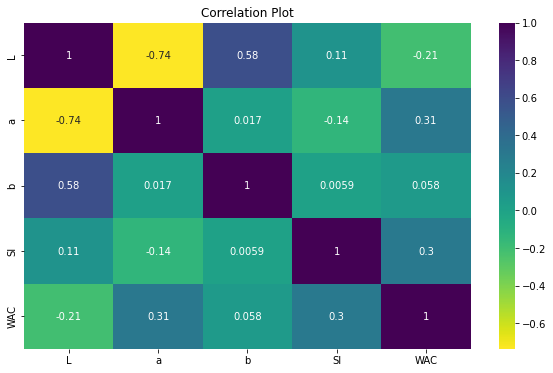

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='viridis_r',annot=True)
plt.title('Correlation Plot');

### OBSERVATIONS

- The most obvious and significantly highest correlation is a negative one between **L** and **a** values. This means the more a sample is described at light, there's a 74% chance it is in the green region and vice versa.

- **b** and **a** showed the next highest correlation positvely at 58%

- The most uncorrelated features was between **SI** and **b**

# Bivariate analysis

> In this section we study the individual analysis of Temperature, Treatment type and Treatment Time each on the recorded values for color, SI and WAC. This would help us determine the empirical relationship between them 

## TEMPERATURE

In [12]:
# Query the dataframe to group features by Temperature and display first 3 rows

df_50c = df.query('Temperature == "50"')
#df_50c.drop(columns=['Temperature'],inplace=True)
df_60c = df.query('Temperature == "60"')
#df_60c.drop(columns=['Temperature'],inplace=True)
df_70c = df.query('Temperature == "70"')
#df_70c.drop(columns=['Temperature'],inplace=True)
print(df_50c.head(3)),print(df_60c.head(3)),print(df_70c.head(3));

  Temperature Treatment  Time      L      a      b    SI   WAC
0          50   control  0min  66.03  11.78  24.41  0.62  3.05
1          50   control  0min  66.96  11.70  24.80  0.60  3.07
2          50   control  0min  66.13  12.05  24.49  0.62  3.03
   Temperature Treatment  Time      L      a      b    SI   WAC
21          60   control  0min  64.32  12.09  23.96  0.72  3.14
22          60   control  0min  64.39  12.04  23.99  0.70  3.11
23          60   control  0min  64.47  11.94  24.09  0.73  3.16
   Temperature Treatment  Time      L      a      b    SI   WAC
42          70   control  0min  61.71  14.59  26.41  0.74  3.49
43          70   control  0min  61.65  14.86  26.40  0.74  3.47
44          70   control  0min  61.64  14.73  26.26  0.76  3.49


## Summary statistics for Temperature at 50C

In [13]:
df_50c.describe()

,L,a,b,SI,WAC
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,64.457619,11.871429,23.519524,0.685238,3.070952
std,2.203772,2.090594,0.754616,0.066530,0.419391
min,60.380000,7.880000,21.970000,0.600000,2.240000
25%,63.050000,10.470000,23.050000,0.650000,2.990000
50%,64.430000,12.210000,23.750000,0.660000,3.070000
75%,66.180000,13.680000,23.910000,0.700000,3.480000
max,67.100000,14.230000,24.800000,0.840000,3.610000


### OBSERVATIONS

- Apart from L which had a higher mean than the total dataset, all other quality criteria had a relatively lower mean.

## Summary statistics for Temperature at 60C

In [14]:
df_60c.describe()

,L,a,b,SI,WAC
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,62.283333,12.934762,23.716190,0.754762,3.758571
std,3.665057,1.268604,1.073282,0.050953,0.353925
min,56.820000,11.690000,21.910000,0.660000,3.110000
25%,58.630000,12.080000,22.460000,0.730000,3.590000
50%,64.390000,12.290000,23.990000,0.760000,3.750000
75%,65.150000,14.030000,24.600000,0.800000,3.960000
max,66.500000,15.500000,25.050000,0.830000,4.330000


### OBSERVATIONS

- At 60C, L and b recorded lower mean values than the original data set. All other quality criteria, recorded higher means.

## Summary statistics for Temperature at 70C

In [15]:
df_70c.describe()

,L,a,b,SI,WAC
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,65.726667,13.007619,24.971429,0.766667,3.434286
std,4.531008,1.801605,1.224632,0.031990,0.443267
min,59.740000,10.630000,23.370000,0.730000,2.840000
25%,61.710000,10.910000,24.000000,0.740000,3.050000
50%,63.500000,13.210000,24.530000,0.760000,3.390000
75%,70.990000,14.590000,26.130000,0.800000,3.540000
max,72.340000,15.770000,26.850000,0.830000,4.330000


### OBSERVATIONS

- Apart from WAC which had a marginally higher value than the WAC of the original data, all other recorded values for each quality criteria recorded significantly higher values than the original data.

## Effect of Temperature on Color

In [16]:
def color_effect(df1, df2, df3, text1, text2, text3):
    fig, ax = plt.subplots(ncols = 3,nrows=3, figsize=[20,15])

    sns.boxplot(data=df1, x='L', ax=ax[0,0])
    ax[0,0].set_title('Effect of '+ text1 + ' on L')
    sns.boxplot(data=df1, x='a', ax=ax[0,1])
    ax[0,1].set_title('Effect of '+ text1 + ' on a')
    sns.boxplot(data=df1, x='b', ax=ax[0,2])
    ax[0,2].set_title('Effect of '+ text1 + ' on b')
    sns.boxplot(data=df2, x='L', ax=ax[1,0])
    ax[1,0].set_title('Effect of '+ text2 + ' on L')
    sns.boxplot(data=df2, x='a', ax=ax[1,1])
    ax[1,1].set_title('Effect of '+ text2 + ' on a')
    sns.boxplot(data=df2, x='b', ax=ax[1,2])
    ax[1,2].set_title('Effect of '+ text2 + ' on b')
    sns.boxplot(data=df3, x='L', ax=ax[2,0])
    ax[2,0].set_title('Effect of '+ text3 + ' on L')
    sns.boxplot(data=df3, x='a', ax=ax[2,1])
    ax[2,1].set_title('Effect of '+ text3 + ' on a')
    sns.boxplot(data=df3, x='b', ax=ax[2,2])
    ax[2,2].set_title('Effect of '+ text3 + ' on b');

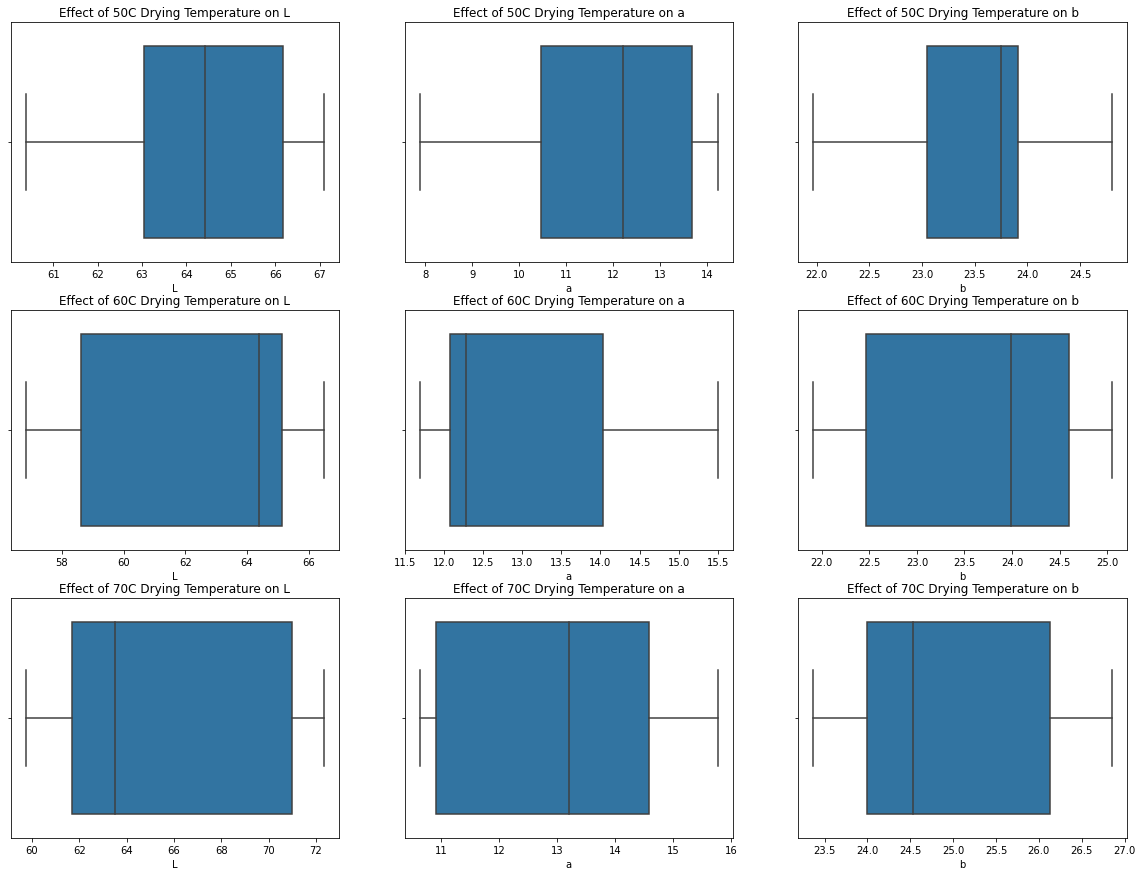

In [17]:
color_effect(df_50c,df_60c,df_70c, '50C Drying Temperature', '60C Drying Temperature','70C Drying Temperature')

### OBSERVATIONS

- 60C has the lowest L value while the highest L was recorded at 70C. 
- 50C had the lowest a value being significantly lower than the a value of both 60C and 70C.

## Effect of Temperature on Swelling Index and Water Absorption Capacity

In [18]:
def si_wac(df1,df2,df3,text1,text2,text3):

    fig, ax = plt.subplots(ncols = 3,nrows= 2, figsize=[22,10])

    sns.boxplot(data=df1, x='SI', ax=ax[0,0])
    ax[0,0].set_title('SI at '+ text1)
    sns.boxplot(data=df2, x='SI', ax=ax[0,1])
    ax[0,1].set_title('SI at '+ text2)
    sns.boxplot(data=df3, x='SI', ax=ax[0,2])
    ax[0,2].set_title('SI at '+ text3)

    sns.boxplot(data=df1, x='WAC', ax=ax[1,0])
    ax[1,0].set_title('WAC at '+ text1)
    sns.boxplot(data=df2, x='WAC', ax=ax[1,1])
    ax[1,1].set_title('WAC at '+ text2)
    sns.boxplot(data=df3, x='WAC', ax=ax[1,2])
    ax[1,2].set_title('WAC at '+ text3);

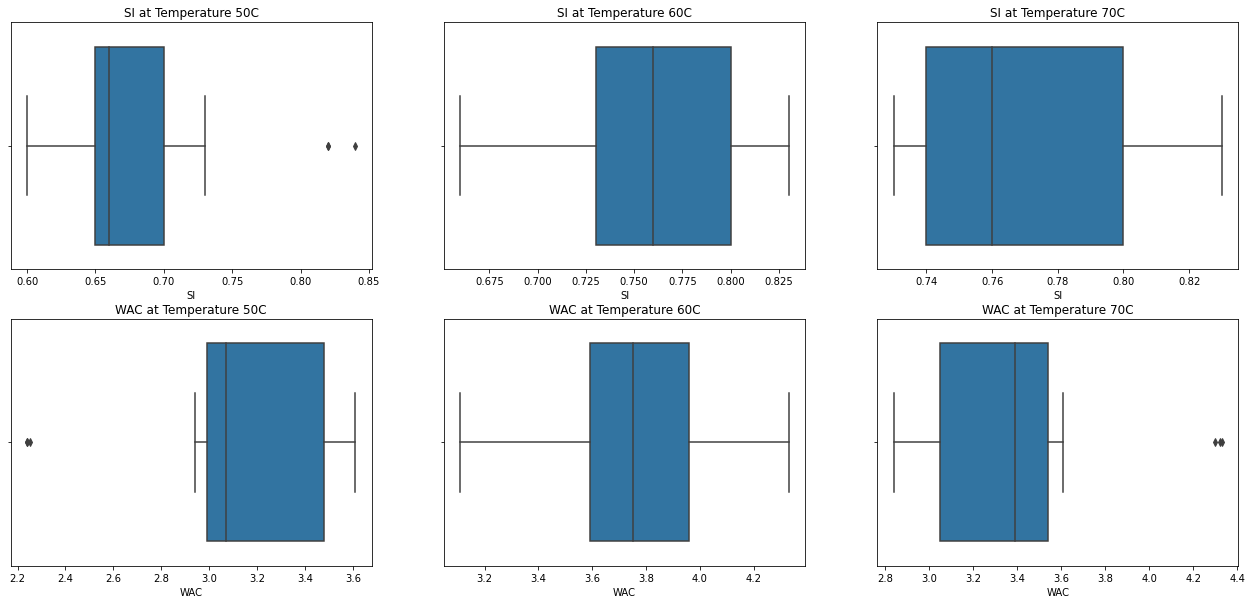

In [19]:
si_wac(df_50c,df_60c,df_70c,'Temperature 50C','Temperature 60C', 'Temperature 70C')

### OBSERVATIONS

- SI at 50C recorded the highest values as outliers and the lowest value as well within the range

- SI at 70C had the lowest range of values among the three temperatures describing a more consistent SI.

## Correlation by Temperature

In [20]:
def corr_plot(df1,df2,df3,txt1,txt2,txt3):
    fig, ax = plt.subplots(ncols = 3, figsize=[16,4])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

    sns.heatmap(df1.corr(), cmap='viridis_r',annot=True, ax=ax[0])
    ax[0].set_title('Correlation at ' +txt1)

    sns.heatmap(df2.corr(), cmap='viridis_r',annot=True, ax=ax[1])
    ax[1].set_title('Correlation at ' +txt2)

    sns.heatmap(df3.corr(), cmap='viridis_r',annot=True, ax=ax[2])
    ax[2].set_title('Correlation at ' +txt3);

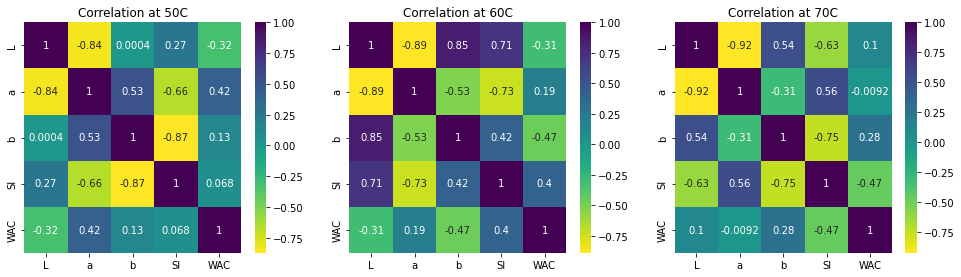

In [21]:
corr_plot(df_50c,df_60c,df_70c,'50C','60C','70C')

### OBSERVATIONS
(For this purpose only correlations above 0.8 would be considered as significant)

- Correlation between L and a and SI and b were the highest at drying temperature of 50C. Both had a negative correlation of -0.84 and -0.87 respectively. This means that at 50C, Increasing L (higher luminance) will most likely reduce the value of a (more green)

- Correlation at 60C was also significant between L and a(-0.89); higher than that of 50C. L and a had a high positive correlation as well (0.87)

- L and a recorded the highest correlation at 70C (-0.91)

## Pair-wise Plot

In [22]:
def pw_plot(df1,feature):
    g = sns.PairGrid(df, hue=feature)
    g.map_diag(sns.histplot)
    g.map_offdiag(sns.scatterplot)
    g.add_legend();

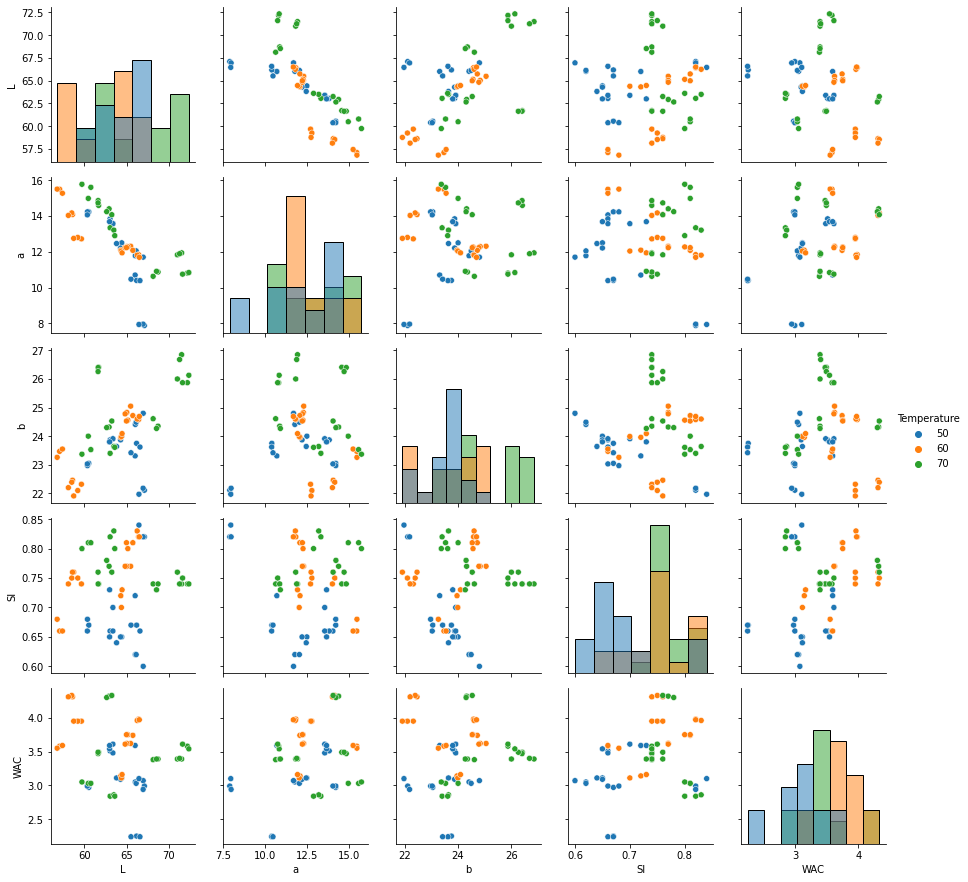

In [23]:
pw_plot(df,"Temperature")

Relationships to note

- L and a for all temperatures

- SI and b at 50C

# TREATMENT

In [24]:
# Query the dataframe to group features by Treatment and display first 3 rows

df_co = df.query('Treatment == "control"')
df_hw = df.query('Treatment == "hot water"')
df_aa = df.query('Treatment == "ascorbic acid"')

print("Control",df_co.head(3)), print("HW", df_hw.head(3)), print("AA", df_aa.head(3));

Control   Temperature Treatment  Time      L      a      b    SI   WAC
0          50   control  0min  66.03  11.78  24.41  0.62  3.05
1          50   control  0min  66.96  11.70  24.80  0.60  3.07
2          50   control  0min  66.13  12.05  24.49  0.62  3.03
HW   Temperature  Treatment  Time      L      a      b    SI   WAC
3          50  hot water  1min  64.43  12.50  24.00  0.65  3.11
4          50  hot water  1min  64.29  12.21  23.87  0.65  3.09
5          50  hot water  1min  63.82  12.46  23.64  0.64  3.11
AA    Temperature      Treatment  Time      L      a      b    SI   WAC
12          50  ascorbic acid  1min  66.01  10.70  23.31  0.72  3.59
13          50  ascorbic acid  1min  63.39  13.57  23.91  0.70  3.61
14          50  ascorbic acid  1min  63.00  13.68  23.80  0.73  3.59


## Descriptive Statistics for No Control (Treatment)

In [25]:
df_co.describe()

,L,a,b,SI,WAC
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,64.144444,12.864444,24.978889,0.692222,3.223333
std,2.062863,1.403986,1.067104,0.061599,0.199311
min,61.640000,11.700000,23.960000,0.600000,3.030000
25%,61.710000,11.940000,24.090000,0.620000,3.070000
50%,64.390000,12.050000,24.490000,0.720000,3.140000
75%,66.030000,14.590000,26.260000,0.740000,3.470000
max,66.960000,14.860000,26.410000,0.760000,3.490000


### OBSERVATIONS

- When the samples were not pre-treated before drying, they had higher mean color attributes (L,a and b) than the mean of the entire data set. SI and WAC were however lower

## Descriptive Statistics for Hot Water Treatment

In [26]:
df_hw.describe()

,L,a,b,SI,WAC
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,63.471852,13.260741,24.043704,0.751852,3.458889
std,2.010044,1.179325,0.603905,0.070604,0.482089
min,59.740000,11.690000,22.970000,0.640000,2.840000
25%,62.800000,12.250000,23.625000,0.665000,3.030000
50%,63.500000,13.210000,24.000000,0.770000,3.510000
75%,65.010000,14.150000,24.570000,0.810000,3.750000
max,66.500000,15.770000,25.050000,0.830000,4.330000


## Descriptive Statistics Ascorbic Acid Treatment

- Samples treated in hot water recorded higher values in all quality criteria except for L.

In [27]:
df_aa.describe()

,L,a,b,SI,WAC
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,64.843704,11.861852,23.791111,0.733704,3.449630
std,5.332228,2.170124,1.548362,0.047243,0.559866
min,56.820000,7.880000,21.910000,0.660000,2.240000
25%,59.010000,10.665000,22.355000,0.710000,3.385000
50%,66.180000,11.830000,23.550000,0.740000,3.550000
75%,68.620000,13.625000,24.480000,0.750000,3.610000
max,72.340000,15.500000,26.850000,0.840000,4.330000


## Effect of Treatment on Color

- Treatments in ascorbic acid recorded an equal mean of SI as the total dataset with a marginally higher WAC. L had lower means and a and b had higher means.

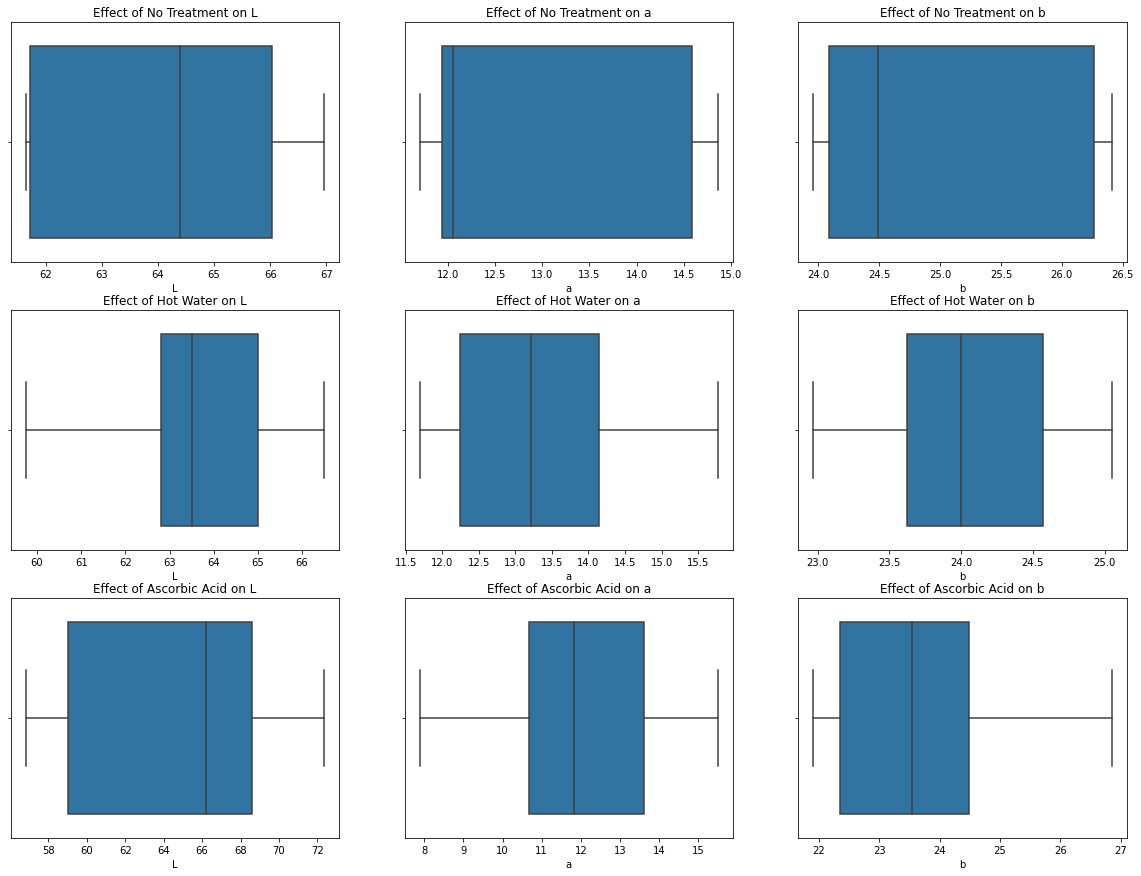

In [28]:
color_effect(df_co,df_hw,df_aa, 'No Treatment', 'Hot Water','Ascorbic Acid')

### OBSERVATIONS

- Pre-treatment in ascorbic acid recorded the widest range of values of all color properties while pre-treatment with hot water recorded the lowest.

## Effect of Treatment on SI and WAC

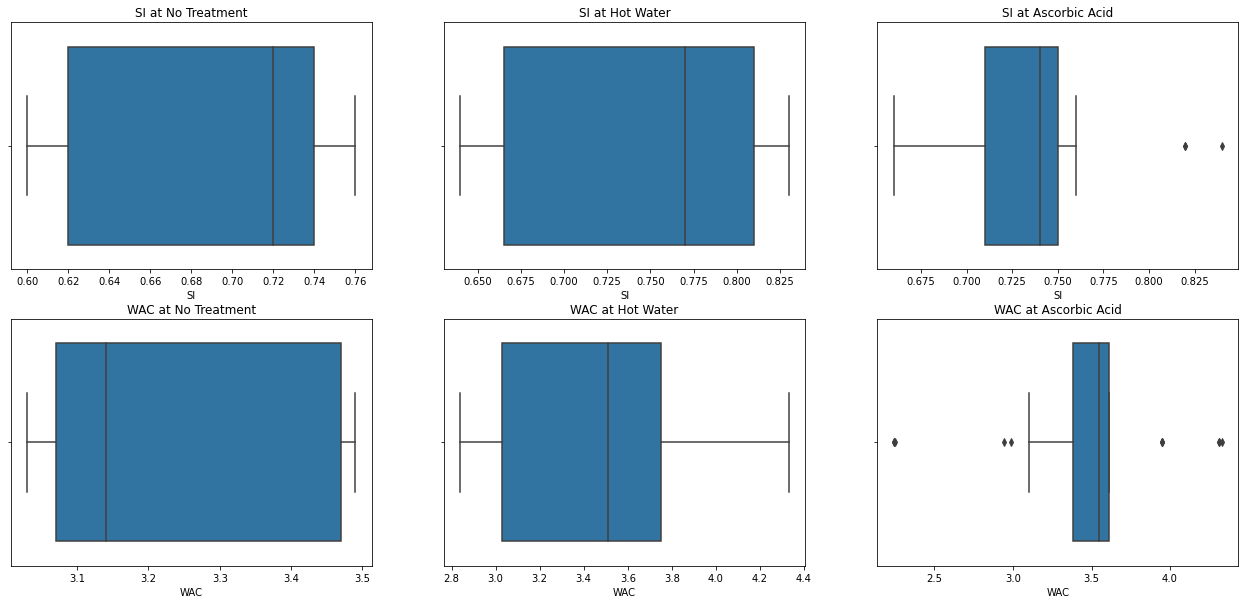

In [29]:
si_wac(df_co,df_hw,df_aa,'No Treatment','Hot Water', 'Ascorbic Acid')

## Correlation by Pre-treatment

- Recorded values for SI and WAC pre-treated with ascorbic showed a number of outliers which significanty increased the range of values. The lowest value of SI recorded was discovered to be associated to the control (no pre-treatment)

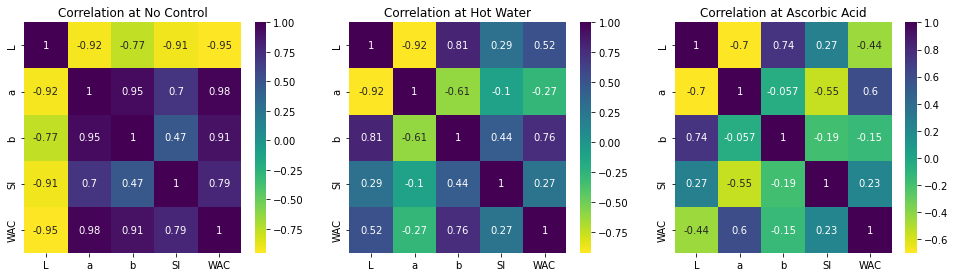

In [30]:
corr_plot(df_co,df_hw,df_aa,'No Control','Hot Water','Ascorbic Acid')

### OBSERVATIONS

- There was very high negative correlation for L and recorded values for , WAC, SI and a at control. a and b, a and WAC, and b and WAC showed very positive correlations as well. L and a values related to hot water pre-treatment also showed the same amount of negative correlation as values at control. Correlation between L and a were positively high at hot water pre-treatment

## Pairwise Plot

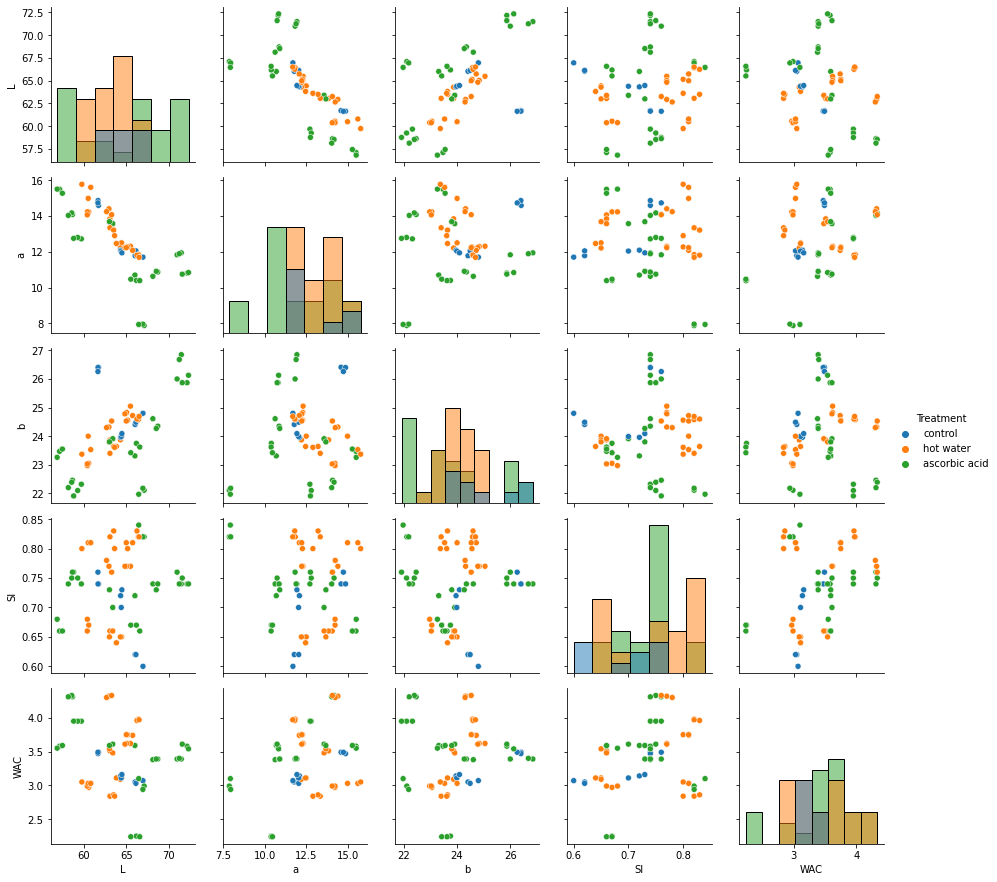

In [31]:
pw_plot(df,"Treatment")

### OBSERVATIONS

Relationships to note

- L and WAC at control

- L and SI at control

- L and a at control

- a and b at control

- a and WAC at control

- b and WAC at control

- L and a at hot water

- L and b at hot water

## PRE-TREATMENT TIME

In [32]:
# Query the dataframe to group features by Treatment Time and display first 3 rows
df_0m = df.query('Time == "0min"')
df_1m = df.query('Time == "1min"')
df_2m = df.query('Time == "2min"')
df_3m = df.query('Time == "3min"')

print("1min",df_1m.head(3)), print("2min", df_2m.head(3)), print("3min", df_3m.head(3));

1min   Temperature  Treatment  Time      L      a      b    SI   WAC
3          50  hot water  1min  64.43  12.50  24.00  0.65  3.11
4          50  hot water  1min  64.29  12.21  23.87  0.65  3.09
5          50  hot water  1min  63.82  12.46  23.64  0.64  3.11
2min   Temperature  Treatment  Time      L      a      b    SI   WAC
6          50  hot water  2min  60.55  14.23  23.05  0.67  2.97
7          50  hot water  2min  60.39  14.23  22.97  0.68  2.99
8          50  hot water  2min  60.38  14.06  23.03  0.66  2.99
3min    Temperature  Treatment  Time      L      a      b    SI   WAC
9           50  hot water  3min  63.05  13.84  23.87  0.66  3.51
10          50  hot water  3min  63.39  13.57  23.91  0.66  3.48
11          50  hot water  3min  63.00  13.68  23.80  0.65  3.54


## Descriptive Statistics for 1min

In [33]:
df_1m.describe()

,L,a,b,SI,WAC
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,64.124444,13.143333,24.452778,0.719444,3.600000
std,4.286934,1.422847,1.089780,0.050348,0.376829
min,56.820000,10.700000,23.260000,0.640000,3.090000
25%,62.955000,12.215000,23.680000,0.665000,3.392500
50%,64.055000,12.480000,24.150000,0.735000,3.590000
75%,65.367500,14.197500,24.817500,0.767500,3.617500
max,71.490000,15.500000,26.850000,0.780000,4.330000


### OBSERVATIONS

- a, b and SI mean values were significantly higher than the means of total dataset with the same properties. L and WAC means recorded under 1min treatment were marginally lower than the means of the original data.

## Descriptive Statistics for 2min Treatment

In [34]:
df_2m.describe()

,L,a,b,SI,WAC
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,63.906111,12.632222,23.819444,0.740556,3.256111
std,4.603987,1.826574,1.258447,0.058659,0.590246
min,58.770000,10.390000,21.910000,0.660000,2.240000
25%,60.382500,10.817500,23.035000,0.672500,2.990000
50%,62.890000,12.495000,23.575000,0.745000,3.295000
75%,66.070000,14.187500,24.552500,0.800000,3.747500
max,72.340000,15.770000,26.130000,0.810000,3.950000


### OBSERVATIONS

- Apart from L which recorded lower values, samples treated for 2min recorded lower means than the total dataset.

## Descriptive Statistics for 3min Treatment

In [35]:
df_3m.describe()

,L,a,b,SI,WAC
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,64.442778,11.908333,23.480000,0.768333,3.506667
std,3.380866,2.169669,0.993763,0.063640,0.526833
min,58.140000,7.880000,21.970000,0.650000,2.840000
25%,63.052500,10.880000,22.407500,0.740000,3.017500
50%,64.930000,12.370000,23.720000,0.780000,3.435000
75%,66.837500,13.652500,24.330000,0.820000,3.967500
max,68.710000,14.170000,24.690000,0.840000,4.330000


### OBSERVATIONS

- a and WAC values recorded at 3min pre-treatment produced lower means than the other properties when compared to the total dataset.

## Effect of Treatment Time on Colour

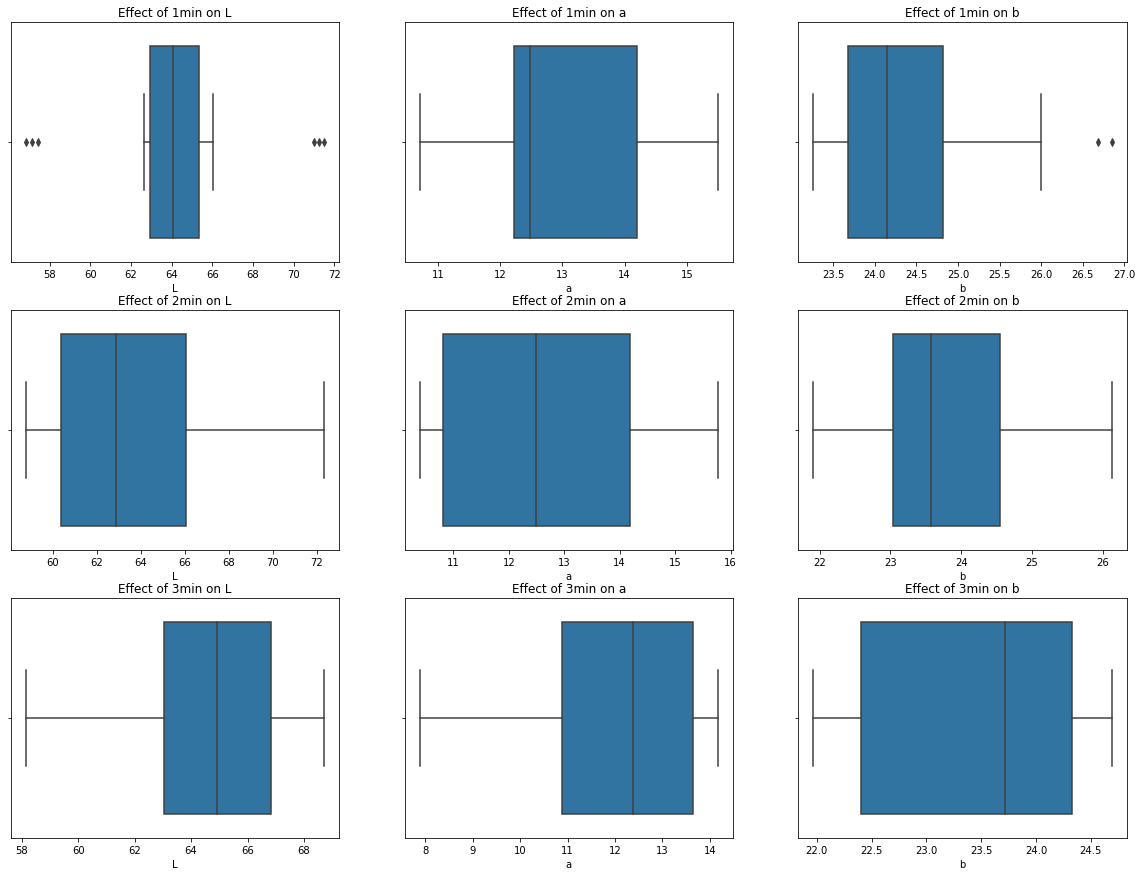

In [36]:
color_effect(df_1m,df_2m,df_3m, '1min', '2min','3min')

### OBSERVATIONS

- L at 2min and 3min recorded the highest and lowest range of values respectively. L at 1min saw a very narrow range of values with a number of outliers at both extremes.

- a at 2min and 3min also saw the highest and lowest range of values respectively.

- b at 1min recorded the highest values to the presence of outliers while it recorded its lowest values at both 2min and 3min.

## Effect of Treatment Time on SI and WAC

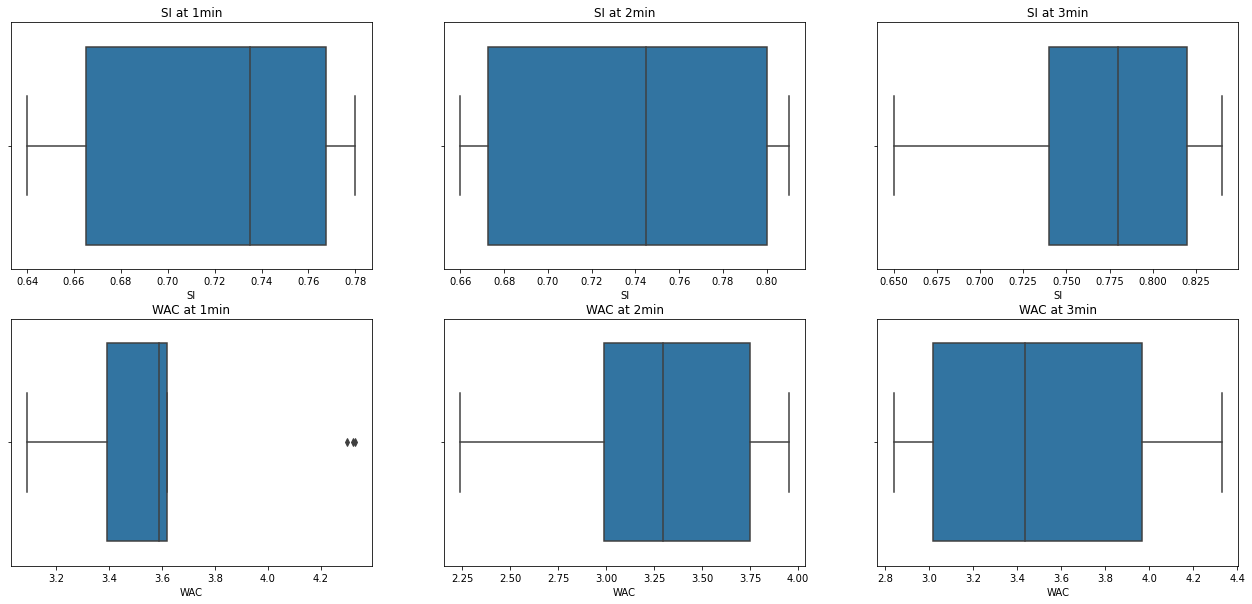

In [37]:
si_wac(df_1m,df_2m,df_3m,'1min','2min', '3min')

### OBSERVATIONS

- SI at 1min recorded the lowest values with SI at 3min recording the highest

- WAC recorded a very narrow range with a few outliers at 1min while recording the lowest values at 2min. The highest values for WAC were recorded at 3min.

## Correlation by Treatment Time

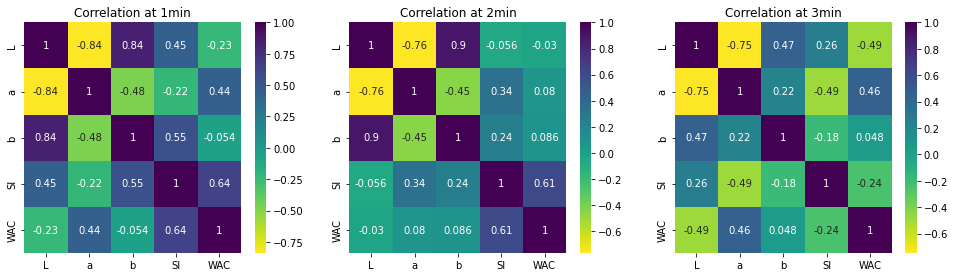

In [38]:
corr_plot(df_1m,df_2m,df_3m,'1min','2min','3min')

### OBSERVATIONS 

- The highest correlations by treatment time was discovered between L and a (negative) and L and b (positive) at 1min.

## Pair-wise Plot

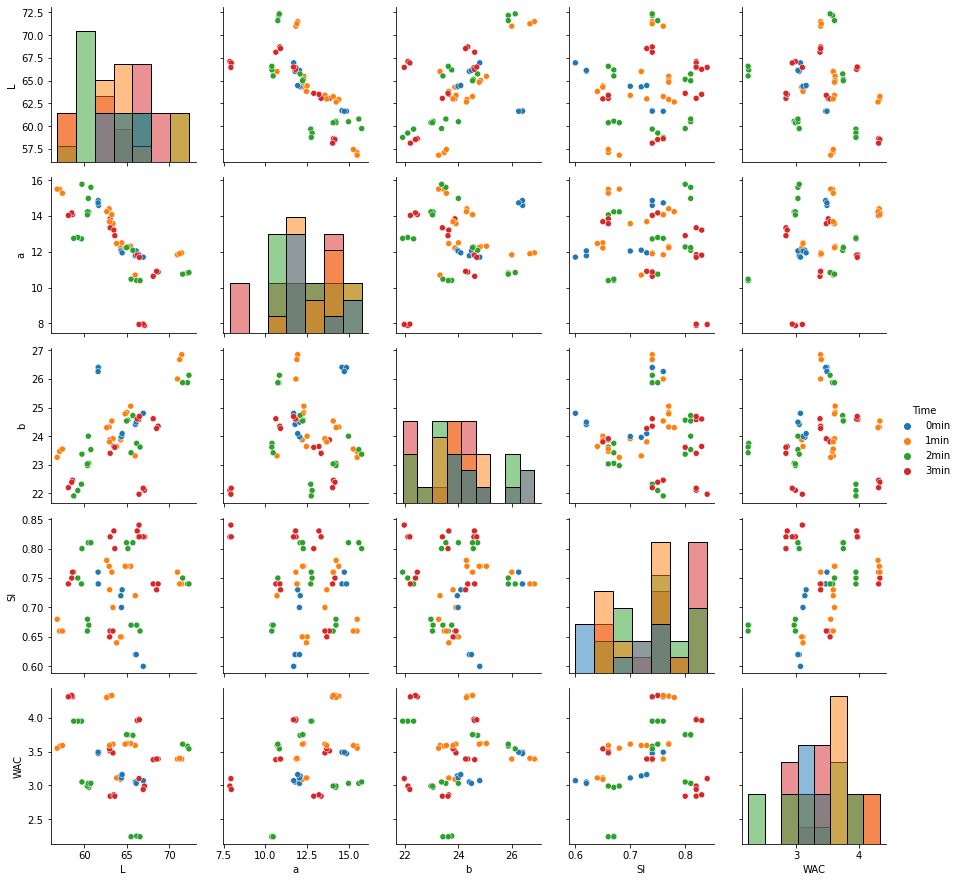

In [39]:
pw_plot(df,"Time")

### OBSERVATIONS

Relationships to note

- L and a

- L and b

# MULTIVARIATE ANALYSIS

## TEMPERATURE AND TREATMENT TIME

## Effect on Color

In [40]:
def multi_color(hue):
    fig, ax = plt.subplots(ncols = 3, figsize=[18,6])

    sns.stripplot(hue=hue, y="L", x='Time', data=df, ax=ax[0])
    ax[0].set_title('Effect of '+ hue+' and Treatment Time on L')
    ax[0].axhline(y=df["L"].mean())

    sns.stripplot(hue=hue, y="a", x='Time', data=df, ax=ax[1])
    ax[1].set_title('Effect of '+ hue+' and Treatment Time on a')
    ax[1].axhline(y=df["a"].mean())

    sns.stripplot(hue=hue, y="b", x='Time', data=df, ax=ax[2])
    ax[2].set_title('Effect of '+ hue+' and Treatment Time on b')
    ax[2].axhline(y=df["b"].mean());

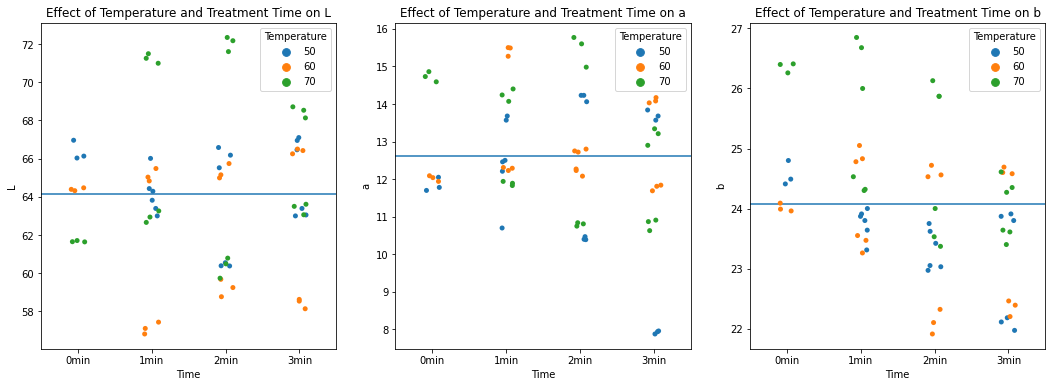

In [41]:
multi_color("Temperature")

### OBSERVATIONS

- 

## Effect on SI and WAC

In [42]:
def multi_siwac(hue):
    fig, ax = plt.subplots(ncols = 2, figsize=[18,6])

    sns.stripplot(hue="Temperature", y="SI", x="Time", data=df, ax=ax[0])
    ax[0].axhline(y=df["SI"].mean())
    ax[0].set_title('SI')

    sns.stripplot(hue="Temperature", y="WAC", x="Time", data=df, ax=ax[1], linestyle="--")
    ax[1].axhline(y=df["WAC"].mean())
    ax[1].set_title('WAC/ mm\u00b3')
    ;

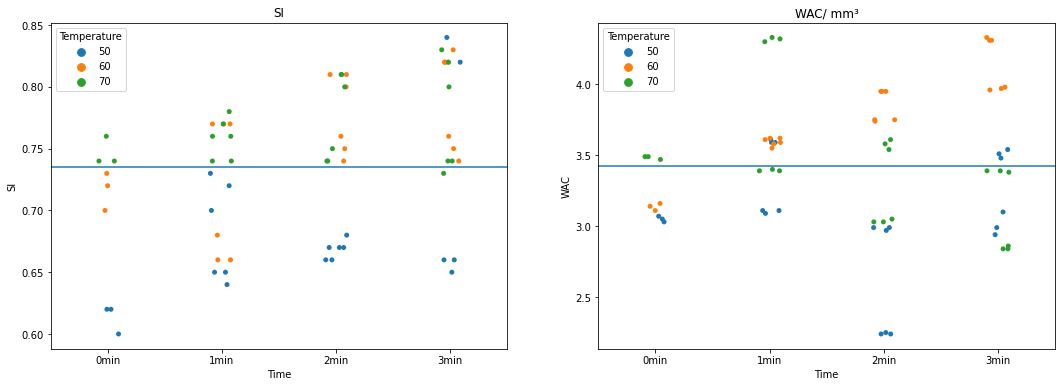

In [43]:
multi_siwac("Temperature")

# TREATMENT AND TREATMENT TIME

## Effect on Color

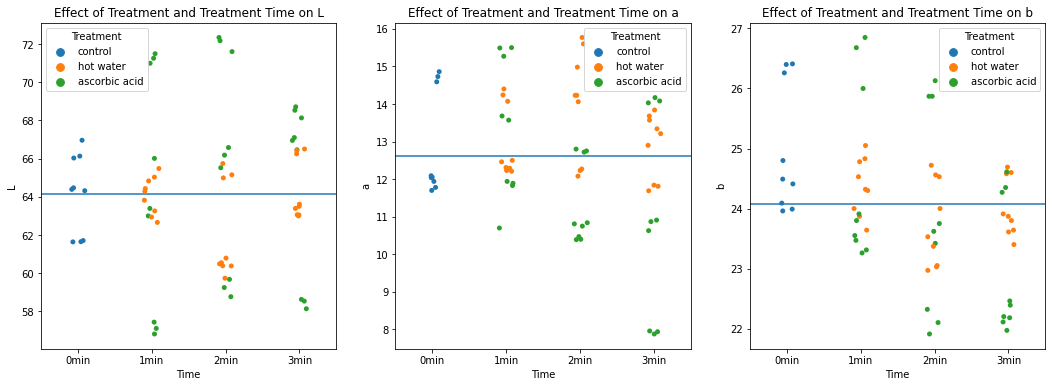

In [44]:
multi_color("Treatment")

### OBSERVATIONS

## Effect on SI and WAC

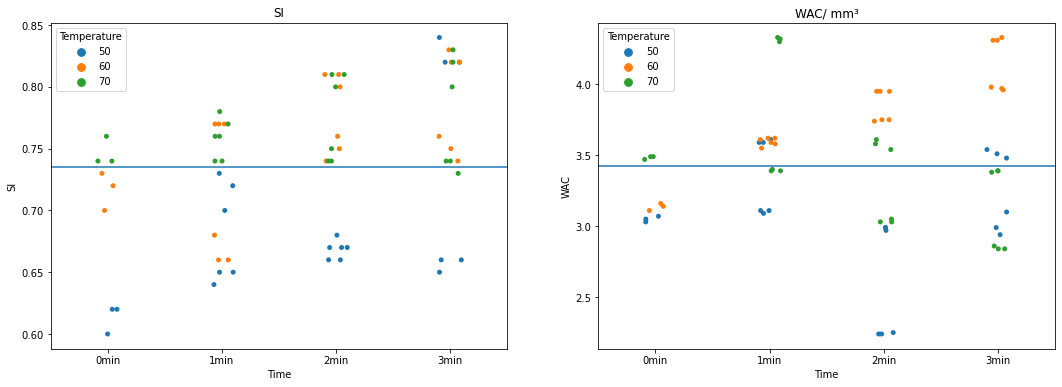

In [45]:
multi_siwac("Treatment")

# Effect of Temperature, Treatment and Treatment Time

In [62]:
def ttt_plot(val):
    g = sns.FacetGrid(df, hue="Temperature", col="Treatment", height=4)
    g.map(sns.stripplot, "Time", val)
    g.add_legend()
    g.refline(y=df[val].mean())


## Effect on L

AttributeError: 'FacetGrid' object has no attribute 'ylabel'

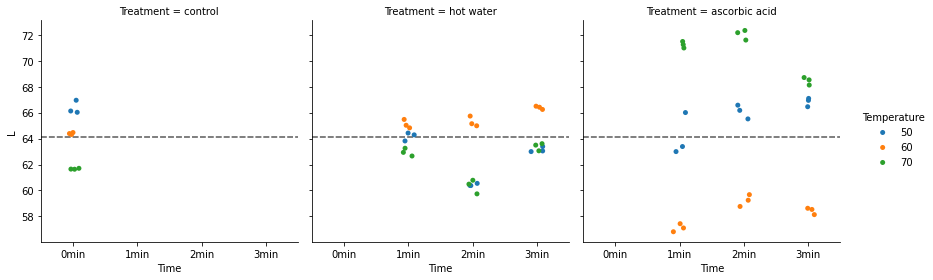

In [63]:
ttt_plot("L")

## Effect on a

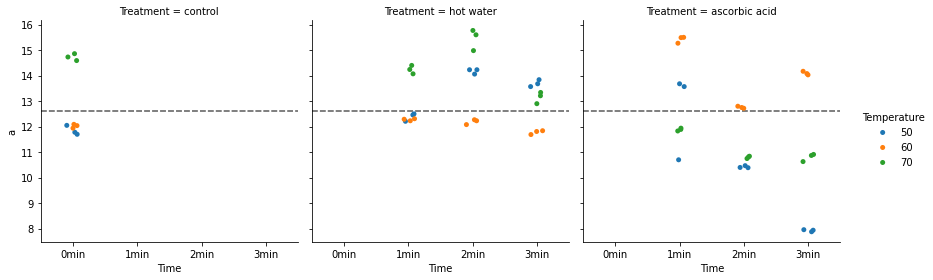

In [48]:
ttt_plot("a")

## Effect on b

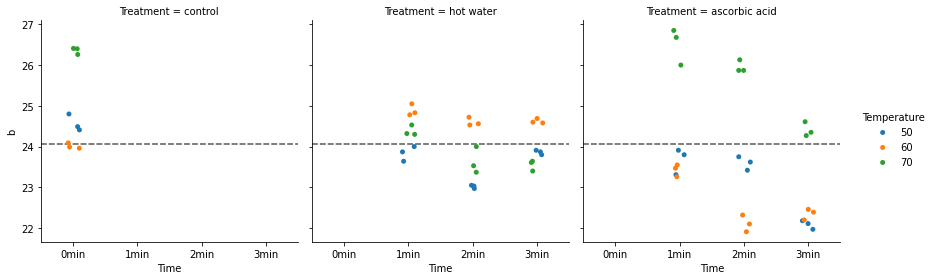

In [49]:
ttt_plot("b")

## Effect on SI

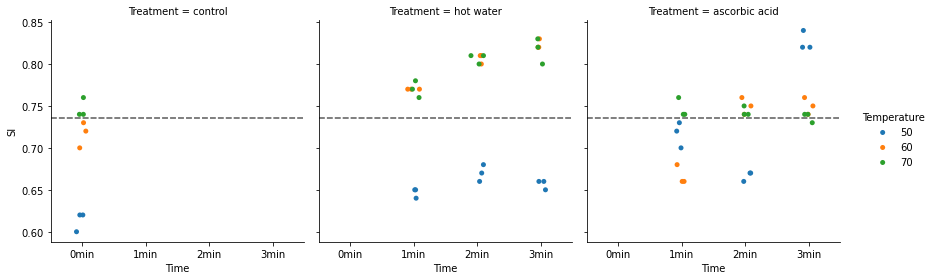

In [50]:
ttt_plot("SI")

## Effect on WAC

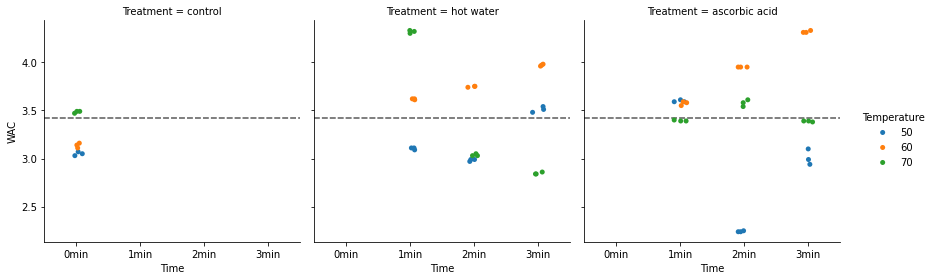

In [51]:
ttt_plot("WAC")